## 🔧 Standardization (Z-score Normalization)

### 📌 What is Standardization?

Standardization is the process of rescaling features so that they have:
- **Mean = 0**
- **Standard deviation = 1**

It transforms the data to follow a **standard normal distribution** (bell curve) using the **Z-score formula**:

$[x'_i = \frac{{x_i} - {\mu}}{\sigma}]$

Where:
- $(x_i)$ is the original value
- $(\mu)$ is the mean of the feature
- $(\sigma)$ is the standard deviation


### 📊 When to Use It?

Use Standardization when:
- Features are **normally distributed** (or nearly so)
- You're using **distance-based models** like:
  - K-Nearest Neighbors (k-NN)
  - Support Vector Machines (SVM)
  - PCA / LDA
  - Gradient Descent-based models

- It does not transform other distribution to normal distribution
- Use it ideally when your data is normally distributed
- It preserves the original shape of the distribution as discussed in one

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [73]:
df = df.drop(columns=["User ID", "Gender"])

In [74]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [75]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'EstimatedSalary']], df["Purchased"], test_size=0.2, random_state=0)

In [76]:
X_train.shape

(320, 2)

In [77]:
X_test.shape

(80, 2)

In [78]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

# Transforming the train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [63]:
X_train.head()

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000


In [79]:
X_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [80]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [81]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [82]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


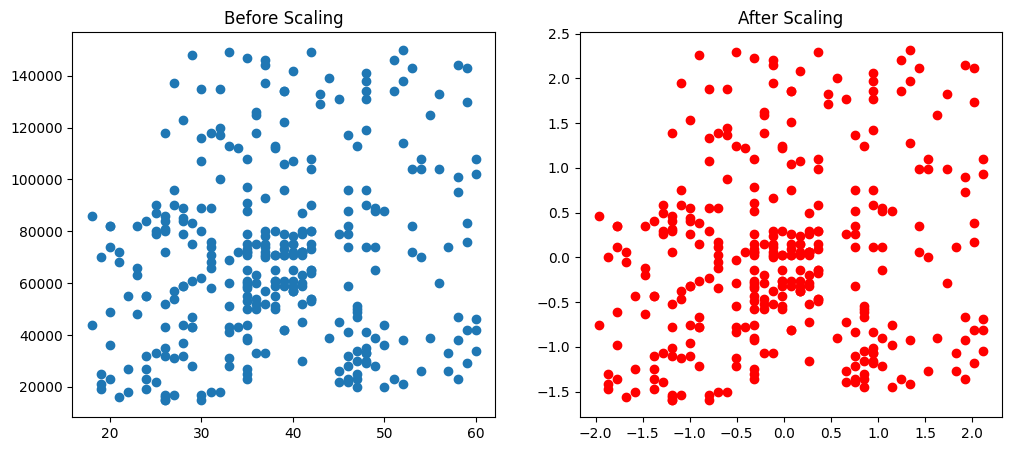

In [83]:
# effect of scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

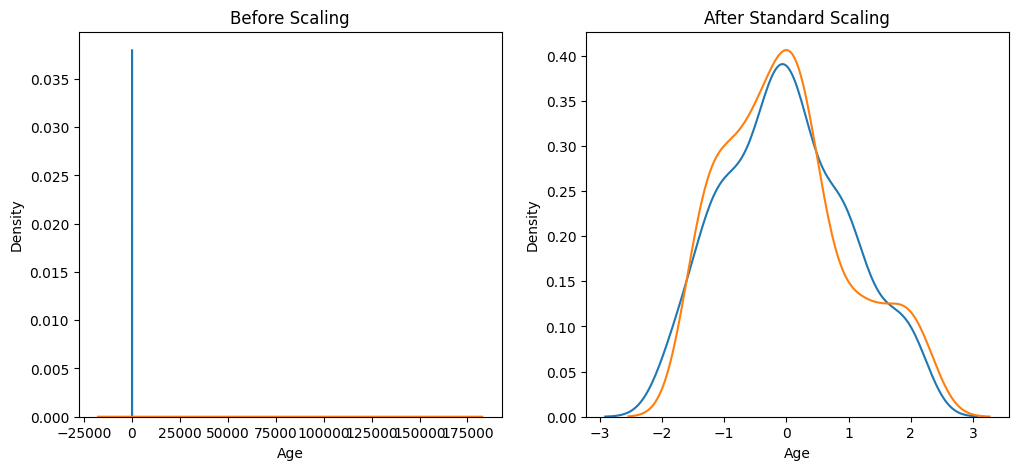

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

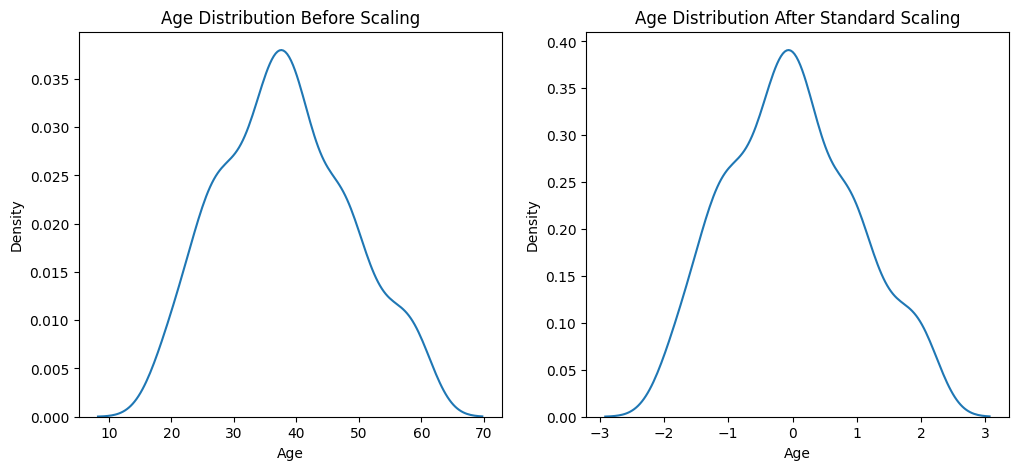

In [85]:
# comparing the distributions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

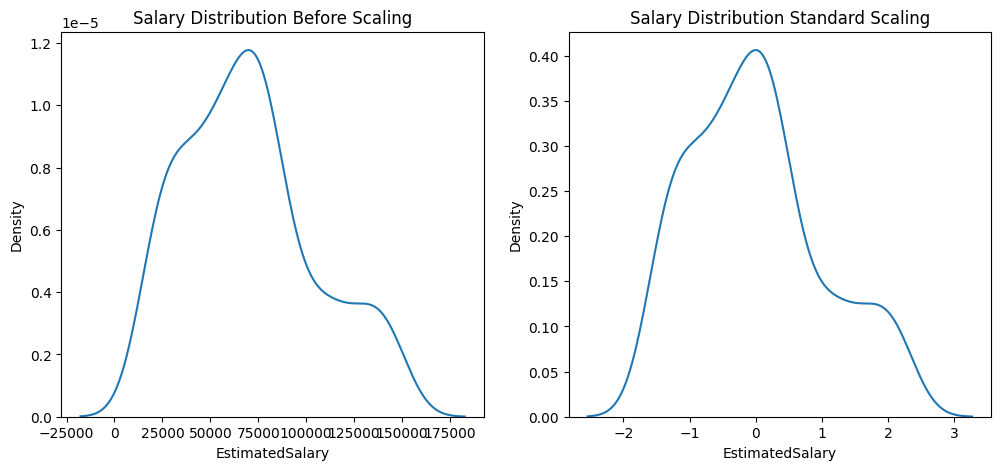

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### 👀 Why scaling is important?

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [89]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [92]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [94]:
from sklearn.metrics import accuracy_score
print("Accuracy before scaling:", accuracy_score(y_test, y_pred))
print("Accuracy after scaling:", accuracy_score(y_test, y_pred_scaled))

Accuracy before scaling: 0.9125
Accuracy after scaling: 0.925


In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [96]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [97]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [98]:
print("Decision Tree Accuracy before scaling:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy after scaling:", accuracy_score(y_test, y_pred_scaled))

Decision Tree Accuracy before scaling: 0.8875
Decision Tree Accuracy after scaling: 0.9125


In [100]:
# note usually scaling does not affect the performance of decision trees as they are not sensitive to feature scaling.
# but here i don't know how tf it increased the accuracy
# i will check it later what happened and will update this comment

In [ ]:
# one more thing scaling has no affect on outliers